In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import pandas as pd
df = pd.read_csv('DATA/library/bnb/topics.csv')

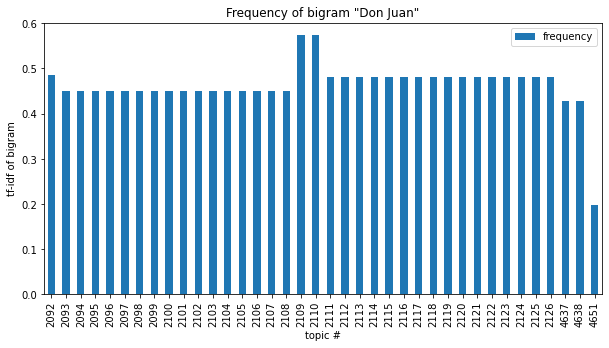

In [4]:
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=False)
matrix = tf.fit_transform(df['Topic'])
arr = matrix.toarray()
# type(matrix)
feature_index = tf.vocabulary_.get('Don Juan')
feature_df = pd.DataFrame(arr[:, feature_index])
feature_df = feature_df[feature_df[0] != 0.0]
feature_df.reset_index(inplace = True)
feature_df.rename(columns = {'index':'topic', 0: 'frequency'}, inplace = True)
feature_df.plot(x='topic', y='frequency', kind='bar', figsize=(10,5), title='Frequency of bigram "Don Juan"')
plt.xlabel('topic #')
plt.ylabel('tf-idf of bigram')
plt.show()

In [7]:
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=False)
matrix = tf.fit_transform(df['Topic'])
words_freqs = matrix.sum(axis=0)

feature_df = pd.DataFrame(arr[:, 0])

words_freqs[0, 0], feature_df.sum()

(1.8346115114924668,
 0    1.834612
 dtype: float64)

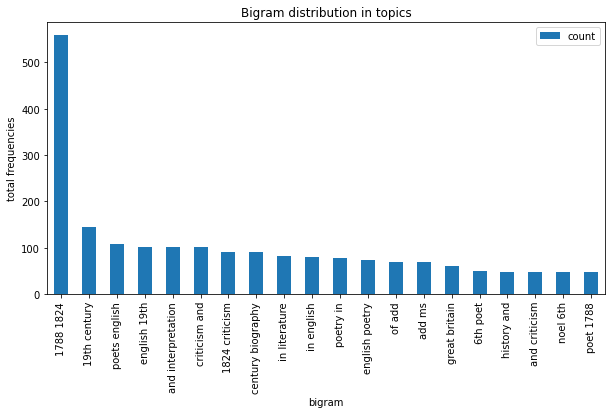

In [8]:
stop_list = ['byron', 'george', 'baron', 'gordon']
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=True, stop_words=stop_list)
matrix = tf.fit_transform(df['Topic'])
total_words = matrix.sum(axis=0) # total words frequencies
# build list of (word, total word frequency)
# [0, idx] because total_words is 2-dimensial
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)
bigram = bigram.head(20)

bigram.plot(x='bigram', y='count', kind='bar', figsize=(10, 5), title='Bigram distribution in topics')
plt.ylabel('total frequencies')
plt.show()

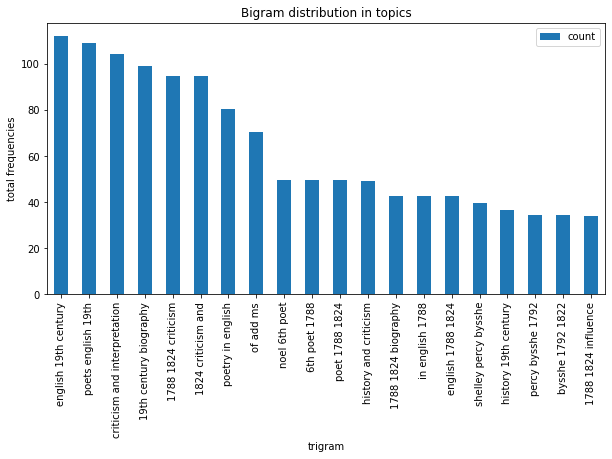

In [9]:
stop_list = ['byron', 'george', 'baron', 'gordon']
tf = TfidfVectorizer(ngram_range=(3,3), lowercase=True, stop_words=stop_list)
matrix = tf.fit_transform(df['Topic'])
total_words = matrix.sum(axis=0) # total words frequencies
# build list of (word, total word frequency)
# [0, idx] because total_words is 2-dimensial
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'trigram', 1: 'count'}, inplace=True)
bigram = bigram.head(20)

bigram.plot(x='trigram', y='count', kind='bar', figsize=(10, 5), title='Bigram distribution in topics')
plt.ylabel('total frequencies')
plt.show()

In [77]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df2 = df[df['Genre'].notnull()]
df2['Title'] = df2['Title'].str.lower()
df2['Title'] = df2['Title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='Title', keep='first', inplace=True)

title, genre = 'Lost angels', 'Biography'
title = title.lower()

data = df2.loc[df2['Genre'].str.contains(genre)]
# create new indices for interacting in all data frames
data.reset_index(level = 0, inplace = True)
print('DATA!')
print(data)

indices = pd.Series(data.index, index = data['Title'])
# print('indices!'.upper())
# print(indices)

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['Title'])

sg = cosine_similarity(tfidf_matrix)
# print('sg!'.upper())
# print(sg)

# bad approach because there are many titles that includes particular phrases
# use command == title
idx = indices[indices.index.str.contains(title)][0]
# print(type(indices[indices.index.str.contains(title)]))
# enumerated indices sorrespondes indices in 'data'
sig = list(enumerate(sg[idx]))
sig = sorted(sig, key=lambda x: x[1], reverse=True)
sig = sig[1:6]

book_indices = [i[0] for i in sig]

pd.options.display.max_rows = 10
pd.options.display.max_columns = 3
pd.options.display.max_colwidth = 100
rec = data['Title'].iloc[book_indices]

print(rec)

DATA!
    index  ... Provenance
0      21  ...        NaN
1      29  ...        NaN
2      68  ...        NaN
3      69  ...        NaN
4      87  ...        NaN
..    ...  ...        ...
67   1526  ...        NaN
68   1534  ...        NaN
69   1570  ...        NaN
70   1581  ...        NaN
71   1826  ...        NaN

[72 rows x 31 columns]
20                                                    recollections of the last days of shelley and byron
0                                                                 records of shelley byron and the author
21                                               recollections of the last days of shelley and byron 1858
51           lives of the great romantics i shelley byron and wordsworth by their contemporaries volume 2
1     bajroni në shqipëri dhe takimet me ali pashë tepelenën vjeshtë 1809 me rastin e 200 vjetorit të ...
Name: Title, dtype: object


<ipython-input-77-f0af77366384>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].str.lower()
<ipython-input-77-f0af77366384>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].apply(func=remove_punctuation)
<ipython-input-77-f0af77366384>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [61]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df2 = df[df['Genre'].notnull()]
# df2 = df.copy()
df2['Title'] = df2['Title'].str.lower()
df2['Title'] = df2['Title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='Title', keep='first', inplace=True)
# print(df.shape, df2.shape)

title, genre = 'Lost angels', 'Biography'
title = title.lower()

data = df2.loc[df2['Genre'].str.contains(genre)]
data.reset_index(level = 0, inplace = True)
print(data)
indices = pd.Series(data.index, index = data['Title'])

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['Title'])

sg = cosine_similarity(tfidf_matrix)

df3 = pd.DataFrame(sg)

pd.options.display.max_rows = None
df3

    index  \
0      21   
1      29   
2      68   
3      69   
4      87   
5     131   
6     133   
7     134   
8     135   
9     137   
10    140   
11    141   
12    147   
13    158   
14    186   
15    329   
16    334   
17    373   
18    421   
19    423   
20    424   
21    425   
22    431   
23    457   
24    571   
25    586   
26    587   
27    588   
28    596   
29    644   
30    645   
31    671   
32    700   
33    742   
34    745   
35    771   
36    778   
37    807   
38    820   
39    822   
40    824   
41    829   
42    840   
43    845   
44    846   
45    847   
46    855   
47    870   
48    895   
49    897   
50    907   
51    910   
52    911   
53    951   
54    971   
55    973   
56    982   
57   1074   
58   1163   
59   1188   
60   1232   
61   1283   
62   1285   
63   1286   
64   1310   
65   1337   
66   1516   
67   1526   
68   1534   
69   1570   
70   1581   
71   1826   

                                                  

<ipython-input-61-8e0dfa6282e9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].str.lower()
<ipython-input-61-8e0dfa6282e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].apply(func=remove_punctuation)
<ipython-input-61-8e0dfa6282e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.055740,0.114302,0.000000,0.0,...,0.0,0.041990,0.043655,0.0,0.000000,0.000000,0.000000,0.0,0.054828,0.0
5,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.206728,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
6,0.000000,0.0,0.0,0.0,0.055740,0.000000,1.000000,0.079723,0.000000,0.0,...,0.0,0.029287,0.030448,0.0,0.000000,0.000000,0.000000,0.0,0.038242,0.0
7,0.000000,0.0,0.0,0.0,0.114302,0.000000,0.079723,1.000000,0.000000,0.0,...,0.0,0.060056,0.062438,0.0,0.000000,0.000000,0.000000,0.0,0.078419,0.0
8,0.000000,0.0,0.0,0.0,0.000000,0.206728,0.000000,0.000000,1.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
9,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
